In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, fixed, IntSlider, FloatSlider, Layout

In [2]:
# enter paths to csv files
nav_csv = r"c:\Users\Chris Yeung\Queen's University\Amoon Jamzad - Breast_navigated_iKnife\2024-07-26_SecondCase\iKnifeSyncData.csv"
chr_xlsx = r"c:\Users\Chris Yeung\Queen's University\Amoon Jamzad - Breast_navigated_iKnife\2024-07-26_SecondCase\Case142.xlsx"
caut_csv = r"c:\Users\Chris Yeung\Queen's University\Amoon Jamzad - Breast_navigated_iKnife\2024-05-10_1030_Engel\CauteryState.csv"
sheet_name = "Sheet2"

In [3]:
# read nav csv
nav_df = pd.read_csv(nav_csv)
nav_df.head()

,Time (s),Scan Number,Cautery Tip Needle,Distance To Tumour (mm),Cautery Speed (mm/s),Tumor Center,Tumor Dimensions,TIC
0,0.111,NaN,[114.70770264 160.32258606 27.31844139],181.841049,3367.558721,[-14.85299317 3.97462617 66.05943855],[21.29864311 23.94656372 21.28066254],NaN
1,0.255,NaN,[111.83368683 135.85122681 32.54558563],159.109986,173.358258,[-14.85299317 3.97462617 66.05943855],[21.29864311 23.94656372 21.28066254],NaN
2,0.381,NaN,[104.82010651 98.27846527 46.00753784],123.160084,313.843347,[-14.85299317 3.97462617 66.05943855],[21.29864311 23.94656372 21.28066254],NaN
3,0.528,NaN,[98.99256897 85.39936066 62.49929428],107.733223,143.631327,[-14.85299317 3.97462617 66.05943855],[21.29864311 23.94656372 21.28066254],NaN
4,0.660,NaN,[86.77541351 75.42621613 70.45258331],91.839698,120.706037,[-14.85299317 3.97462617 66.05943855],[21.29864311 23.94656372 21.28066254],NaN


In [4]:
# convert distance to tumor to binary value
nav_df["encroachment"] = nav_df["Distance To Tumour (mm)"] < 0
nav_df["encroachment"] = nav_df["encroachment"].astype(int)
nav_df.head()

,Time (s),Scan Number,Cautery Tip Needle,Distance To Tumour (mm),Cautery Speed (mm/s),Tumor Center,Tumor Dimensions,TIC,encroachment
0,0.111,NaN,[114.70770264 160.32258606 27.31844139],181.841049,3367.558721,[-14.85299317 3.97462617 66.05943855],[21.29864311 23.94656372 21.28066254],NaN,0
1,0.255,NaN,[111.83368683 135.85122681 32.54558563],159.109986,173.358258,[-14.85299317 3.97462617 66.05943855],[21.29864311 23.94656372 21.28066254],NaN,0
2,0.381,NaN,[104.82010651 98.27846527 46.00753784],123.160084,313.843347,[-14.85299317 3.97462617 66.05943855],[21.29864311 23.94656372 21.28066254],NaN,0
3,0.528,NaN,[98.99256897 85.39936066 62.49929428],107.733223,143.631327,[-14.85299317 3.97462617 66.05943855],[21.29864311 23.94656372 21.28066254],NaN,0
4,0.660,NaN,[86.77541351 75.42621613 70.45258331],91.839698,120.706037,[-14.85299317 3.97462617 66.05943855],[21.29864311 23.94656372 21.28066254],NaN,0


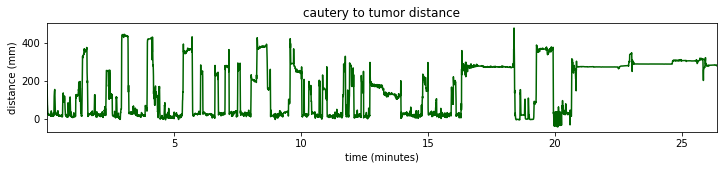

In [5]:
# plot encroachment
t_nav = nav_df["Time (s)"].values
t_nav = (t_nav) / 60 # convert from seconds to minutes
dist = nav_df["Distance To Tumour (mm)"].values

plt.figure(figsize=(12,2))
plt.plot(t_nav, dist, color='darkgreen')
plt.xlim([t_nav.min(), t_nav.max()])
plt.title('cautery to tumor distance')
plt.xlabel('time (minutes)')
plt.ylabel('distance (mm)')
plt.show()

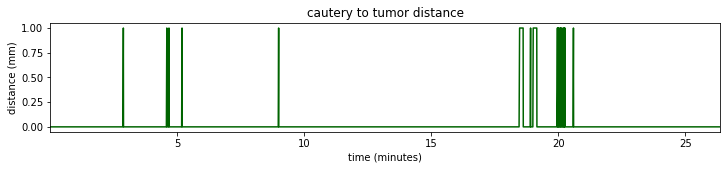

In [6]:
# plot encroachment
breach = nav_df["encroachment"].values

plt.figure(figsize=(12,2))
plt.plot(t_nav, breach, color='darkgreen')
plt.xlim([t_nav.min(), t_nav.max()])
plt.title('cautery to tumor distance')
plt.xlabel('time (minutes)')
plt.ylabel('distance (mm)')
plt.show()

In [7]:
# read chromatogram excel
chr_df = pd.read_excel(chr_xlsx, sheet_name=sheet_name)
chr_df.head()

,Time(min),Abundance,Unnamed: 2,Unnamed: 3,Scan (No.),Abundance.1,Unnamed: 6,Unnamed: 7,Amoons Time check,Unnamed: 9
0,0.034,168884560,NaN,NaN,1,168884560,NaN,NaN,1.0,9.3
1,0.051,163140608,NaN,NaN,2,163140608,NaN,NaN,2.0,20.4
2,0.067,15876783,NaN,NaN,3,15876783,NaN,NaN,NaN,NaN
3,0.084,39804076,NaN,NaN,4,39804076,NaN,NaN,NaN,NaN
4,0.101,231334176,NaN,NaN,5,231334176,NaN,NaN,NaN,NaN


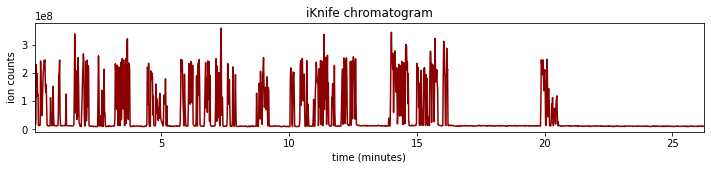

In [8]:
# plot chromatogram
chrom = chr_df["Abundance"].values
t_chrom = chr_df["Time(min)"].values
# s_chrom = chr_df["Scan (No.)"].values

plt.figure(figsize=(12,2))
plt.plot(t_chrom, chrom, color='darkred')
plt.xlim([t_chrom.min(), t_chrom.max()])
plt.title('iKnife chromatogram')
plt.xlabel('time (minutes)')
plt.ylabel('ion counts')
plt.show()

In [7]:
# cautery state
caut_df = pd.read_csv(caut_csv)
caut_df.head()

,time (min),cut on,coag on
0,0.000000,0,0
1,0.000695,0,0
2,0.001390,0,0
3,0.002085,0,0
4,0.002781,0,0


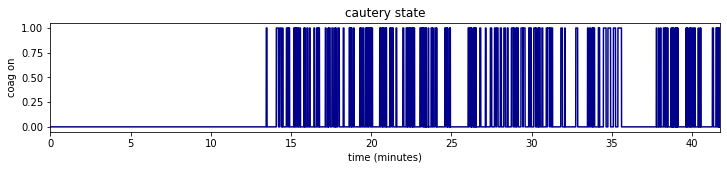

In [8]:
# plot cautery state
caut = caut_df["coag on"].values
t_caut = caut_df["time (min)"].values

plt.figure(figsize=(12,2))
plt.plot(t_caut, caut, color='darkblue')
plt.xlim([t_caut.min(), t_caut.max()])
plt.title('cautery state')
plt.xlabel('time (minutes)')
plt.ylabel('coag on')
plt.show()

In [9]:
def dist_thresholding(shift, dist_thresh, t_start, t_width):
    plt.figure(figsize=(12,2))
    plt.title('chromatogram', loc='left')
    plt.plot(t_chrom, chrom / chrom.max())
    plt.xlim([t_start,t_start+t_width])
    plt.yticks([])
    plt.figure(figsize=(12,2))
    plt.title('cautery tumor encroachment', loc='left')
    plt.plot(t_nav + shift, breach)
#     plt.plot(t_nav + shift, dist/dist.max())
    plt.xlim([t_start,t_start+t_width])
    plt.yticks([])
    plt.xlabel('time (minutes)')
    plt.show()
    plt.figure(figsize=(12,2))
    plt.title('cautery in '+str(dist_thresh)+' mm vicinity of tumor', loc='left')
    # plt.plot(t_chrom, chrom/chrom.max())
    plt.plot(t_nav + shift, dist)
    plt.xlim([t_start,t_start+t_width])
    plt.yticks([])
    plt.xlabel('time (minutes)')
    plt.show()

layout = Layout(width='700px')
aa = interact(dist_thresholding,
              shift = FloatSlider(value=-0.089, min=-10, max=10,step=0.01, layout=layout),
              dist_thresh = IntSlider(value=30, min=0, max=200, step=1, layout=layout),
              t_start = IntSlider(value=7, min=0, max=60, step=0.5, layout=layout),
              t_width = IntSlider(value=6, min=1, max=50, step=1, layout=layout),)

interactive(children=(FloatSlider(value=-0.089, description='shift', layout=Layout(width='700px'), max=10.0, m…

In [9]:
def dist_thresholding(shift, dist_thresh, t_start, t_width):
    plt.figure(figsize=(12,2))
    plt.title('coag on', loc='left')
    plt.plot(t_caut, caut)
    plt.xlim([t_start,t_start+t_width])
    plt.yticks([])
    plt.figure(figsize=(12,2))
    plt.title('cautery tumor encroachment', loc='left')
    plt.plot(t_nav + shift, breach)
#     plt.plot(t_nav + shift, dist/dist.max())
    plt.xlim([t_start,t_start+t_width])
    plt.yticks([])
    plt.xlabel('time (minutes)')
    plt.show()
    plt.figure(figsize=(12,2))
    plt.title('cautery in '+str(dist_thresh)+' mm vicinity of tumor', loc='left')
    # plt.plot(t_chrom, chrom/chrom.max())
    plt.plot(t_nav + shift, dist)
    plt.xlim([t_start,t_start+t_width])
    plt.yticks([])
    plt.xlabel('time (minutes)')
    plt.show()

layout = Layout(width='700px')
aa = interact(dist_thresholding,
              shift = FloatSlider(value=-0.397, min=-20, max=20,step=0.01, layout=layout),
              dist_thresh = IntSlider(value=30, min=0, max=200, step=1, layout=layout),
              t_start = IntSlider(value=7, min=0, max=60, step=0.5, layout=layout),
              t_width = IntSlider(value=6, min=1, max=50, step=1, layout=layout),)

interactive(children=(FloatSlider(value=-0.397, description='shift', layout=Layout(width='700px'), max=20.0, m…